# Model training for each set of features

## Model on raw original features

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
train_features = pd.read_csv('./data/final_data/train_features_raw.csv')
train_labels = pd.read_csv('./data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,62.0,0,0,10.5000,147,2
1,3,1,8.0,4,1,29.1250,147,1
2,3,1,32.0,0,0,56.4958,147,2
3,3,0,20.0,1,0,9.8250,147,2
4,2,0,28.0,0,0,13.0000,147,2


<AxesSubplot:>

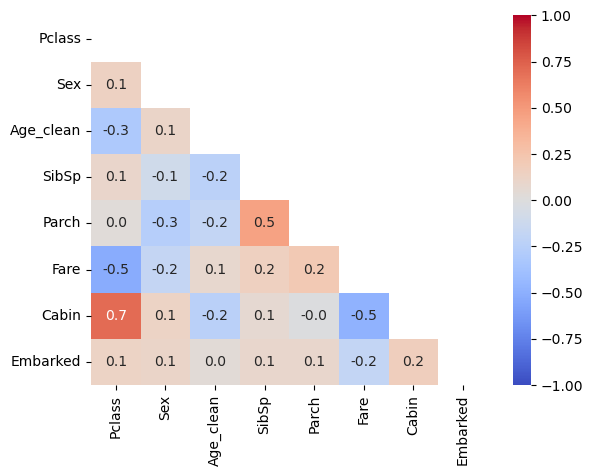

In [3]:
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [4]:
#GridSearch
def print_results(results):
    print('Best params of : {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [5]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best params of : {'max_depth': 8, 'n_estimators': 64}

0.818 (+/-0.045) for {'max_depth': 2, 'n_estimators': 8}
0.775 (+/-0.094) for {'max_depth': 2, 'n_estimators': 16}
0.794 (+/-0.099) for {'max_depth': 2, 'n_estimators': 32}
0.796 (+/-0.083) for {'max_depth': 2, 'n_estimators': 64}
0.796 (+/-0.117) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.114) for {'max_depth': 2, 'n_estimators': 256}
0.798 (+/-0.115) for {'max_depth': 2, 'n_estimators': 512}
0.796 (+/-0.089) for {'max_depth': 4, 'n_estimators': 8}
0.809 (+/-0.082) for {'max_depth': 4, 'n_estimators': 16}
0.822 (+/-0.103) for {'max_depth': 4, 'n_estimators': 32}
0.813 (+/-0.118) for {'max_depth': 4, 'n_estimators': 64}
0.832 (+/-0.109) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.107) for {'max_depth': 4, 'n_estimators': 256}
0.817 (+/-0.1) for {'max_depth': 4, 'n_estimators': 512}
0.835 (+/-0.047) for {'max_depth': 8, 'n_estimators': 8}
0.833 (+/-0.046) for {'max_depth': 8, 'n_estimators': 16}
0.824 (+/-0.068)

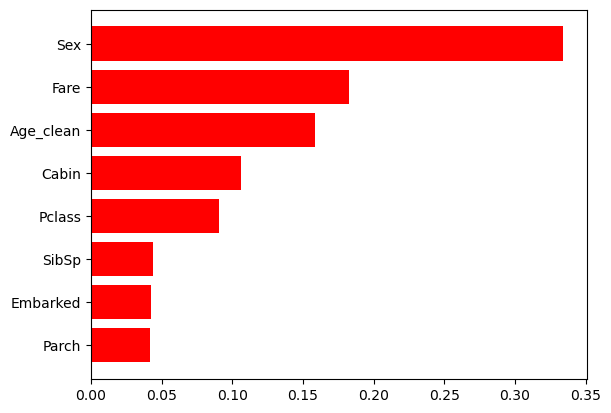

In [6]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [7]:
joblib.dump(cv.best_estimator_, './models/model_raw_original_features.pkl')

['./models/model_raw_original_features.pkl']

# Model on cleaned original feature

In [8]:
train_features = pd.read_csv('./data/final_data/train_features_original.csv')
train_labels = pd.read_csv('./data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,2,1,62.0,0,0,10.5000,147,3
1,3,1,8.0,4,1,29.1250,147,2
2,3,1,32.0,0,0,56.4958,147,3
3,3,0,20.0,1,0,9.8250,147,3
4,2,0,28.0,0,0,13.0000,147,3


In [9]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [10]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.785 (+/-0.125) for {'max_depth': 2, 'n_estimators': 8}
0.787 (+/-0.095) for {'max_depth': 2, 'n_estimators': 16}
0.788 (+/-0.075) for {'max_depth': 2, 'n_estimators': 32}
0.8 (+/-0.1) for {'max_depth': 2, 'n_estimators': 64}
0.8 (+/-0.108) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.103) for {'max_depth': 2, 'n_estimators': 256}
0.792 (+/-0.105) for {'max_depth': 2, 'n_estimators': 512}
0.796 (+/-0.095) for {'max_depth': 4, 'n_estimators': 8}
0.817 (+/-0.084) for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.094) for {'max_depth': 4, 'n_estimators': 32}
0.807 (+/-0.103) for {'max_depth': 4, 'n_estimators': 64}
0.824 (+/-0.106) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.107) for {'max_depth': 4, 'n_estimators': 256}
0.82 (+/-0.114) for {'max_depth': 4, 'n_estimators': 512}
0.831 (+/-0.033) for {'max_depth': 8, 'n_estimators': 8}
0.83 (+/-0.086) for {'max_depth': 8, 'n_estimators': 16}
0.833 (+/-0.051) for {'ma

In [11]:
joblib.dump(cv.best_estimator_, './models/model_cleaned_original_features.pkl')

['./models/model_cleaned_original_features.pkl']

# model on all features

In [12]:
train_features = pd.read_csv('./data/final_data/train_features_all.csv')
train_labels = pd.read_csv('./data/final_data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,2,1,62.0,0,0,10.5000,1.600434,147,0,3,11,0
1,3,1,8.0,4,1,29.1250,1.962697,147,0,2,7,5
2,3,1,32.0,0,0,56.4958,2.240801,147,0,3,11,0
3,3,0,20.0,1,0,9.8250,1.579307,147,0,3,8,1
4,2,0,28.0,0,0,13.0000,1.670278,147,0,3,8,0


In [13]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [14]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 128}

0.764 (+/-0.163) for {'max_depth': 2, 'n_estimators': 8}
0.79 (+/-0.086) for {'max_depth': 2, 'n_estimators': 16}
0.781 (+/-0.105) for {'max_depth': 2, 'n_estimators': 32}
0.794 (+/-0.12) for {'max_depth': 2, 'n_estimators': 64}
0.794 (+/-0.105) for {'max_depth': 2, 'n_estimators': 128}
0.779 (+/-0.125) for {'max_depth': 2, 'n_estimators': 256}
0.787 (+/-0.098) for {'max_depth': 2, 'n_estimators': 512}
0.817 (+/-0.084) for {'max_depth': 4, 'n_estimators': 8}
0.813 (+/-0.115) for {'max_depth': 4, 'n_estimators': 16}
0.826 (+/-0.102) for {'max_depth': 4, 'n_estimators': 32}
0.818 (+/-0.087) for {'max_depth': 4, 'n_estimators': 64}
0.818 (+/-0.111) for {'max_depth': 4, 'n_estimators': 128}
0.82 (+/-0.11) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.088) for {'max_depth': 4, 'n_estimators': 512}
0.828 (+/-0.082) for {'max_depth': 8, 'n_estimators': 8}
0.828 (+/-0.057) for {'max_depth': 8, 'n_estimators': 16}
0.828 (+/-0.067) for 

In [ ]:
joblib.dump(cv.best_estimator_, './models/model_all_features.pkl')

In [15]:

train_features = pd.read_csv('./data/final_data/train_features_reduced.csv')
train_labels = pd.read_csv('./data/final_data/train_labels.csv')
train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,2,1,62.0,0,1.600434,0,11
1,3,1,8.0,5,1.962697,0,7
2,3,1,32.0,0,2.240801,0,11
3,3,0,20.0,1,1.579307,0,8
4,2,0,28.0,0,1.670278,0,8


In [16]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [17]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 8}

0.815 (+/-0.059) for {'max_depth': 2, 'n_estimators': 8}
0.796 (+/-0.101) for {'max_depth': 2, 'n_estimators': 16}
0.796 (+/-0.098) for {'max_depth': 2, 'n_estimators': 32}
0.803 (+/-0.125) for {'max_depth': 2, 'n_estimators': 64}
0.783 (+/-0.115) for {'max_depth': 2, 'n_estimators': 128}
0.785 (+/-0.116) for {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-0.119) for {'max_depth': 2, 'n_estimators': 512}
0.832 (+/-0.1) for {'max_depth': 4, 'n_estimators': 8}
0.813 (+/-0.113) for {'max_depth': 4, 'n_estimators': 16}
0.811 (+/-0.105) for {'max_depth': 4, 'n_estimators': 32}
0.822 (+/-0.087) for {'max_depth': 4, 'n_estimators': 64}
0.813 (+/-0.098) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.1) for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.101) for {'max_depth': 4, 'n_estimators': 512}
0.815 (+/-0.091) for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.078) for {'max_depth': 8, 'n_estimators': 16}
0.813 (+/-0.087) for {'

In [20]:
joblib.dump(cv.best_estimator_, './models/model_reduced_features.pkl')

['./models/model_reduced_features.pkl']